In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 3
resnet_weights_path = 'C:/Users/Soumya/Python_Workspace/DEEP_LEARNING/RoomDetect/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [3]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        'C:/Users/Soumya/Python_Workspace/DEEP_LEARNING/RoomDetect/RoomDetect/TrainingImages',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

"""
        validation_generator = data_generator.flow_from_directory(
        'C:/Users/Soumya/Python_Workspace/DEEP_LEARNING/RoomDetect/RoomDetect/TestingImages',
        target_size=(image_size, image_size),
        class_mode='categorical')
"""

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        #validation_data=validation_generator,
        #validation_steps=1
                          )

Found 150 images belonging to 3 classes.
Epoch 1/1
3/3 [==============================] - 93s 31s/step - loss: 1.1632 - acc: 0.4398


In [5]:
from os.path import join

image_dir = 'C:/Users/Soumya/Python_Workspace/DEEP_LEARNING/RoomDetect/RoomDetect/Test'

img_paths = [join(image_dir, filename) for filename in 
                           ['f (46).jpg',
                            'f2 (12).jpg',
                            'f3 (8).jpg']]


In [6]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path,grayscale=False, target_size=(img_height, img_width),interpolation='nearest')for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

In [7]:
from tensorflow.python.keras.applications import ResNet50
test_data = read_and_prep_images(img_paths)
preds = my_new_model.predict(test_data)

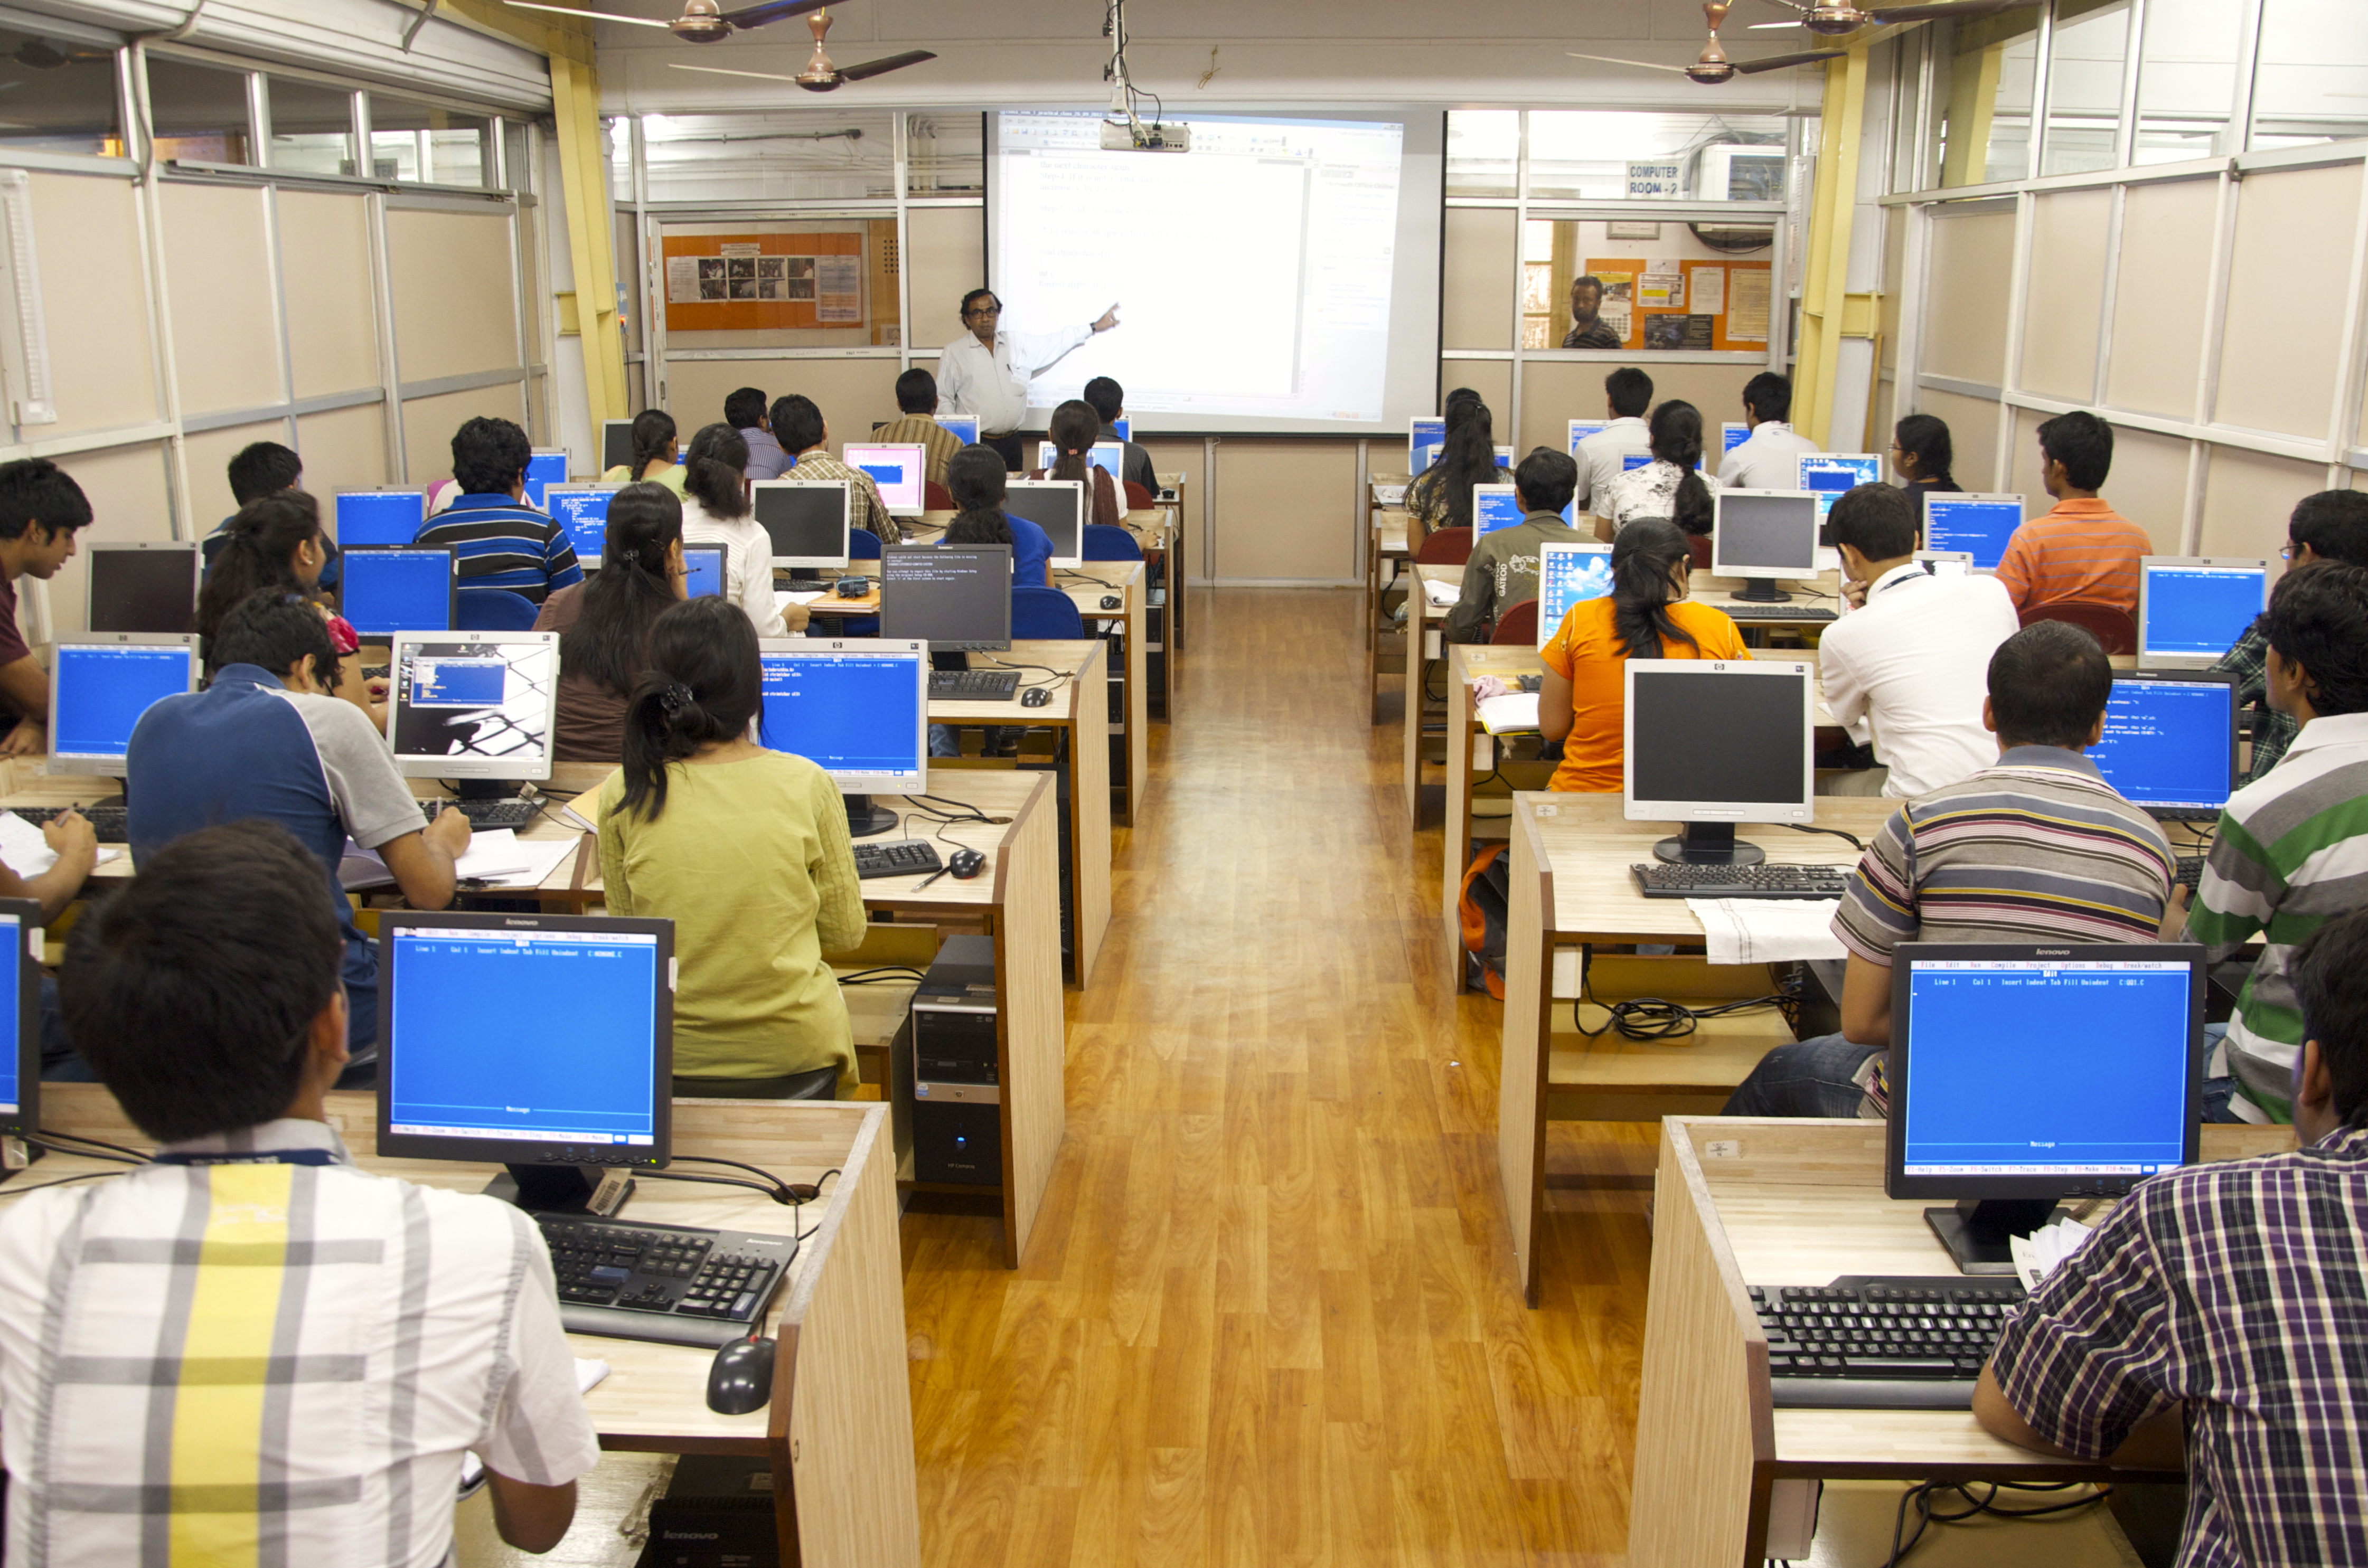

[('001', 'label1', 0.4489845)]


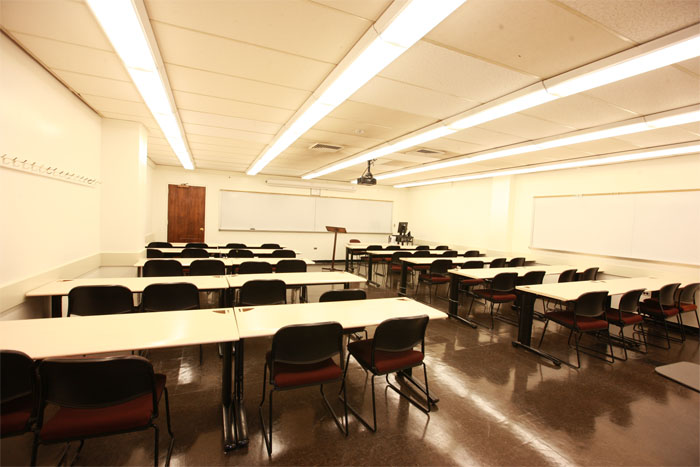

[('010', 'label2', 0.88745844)]


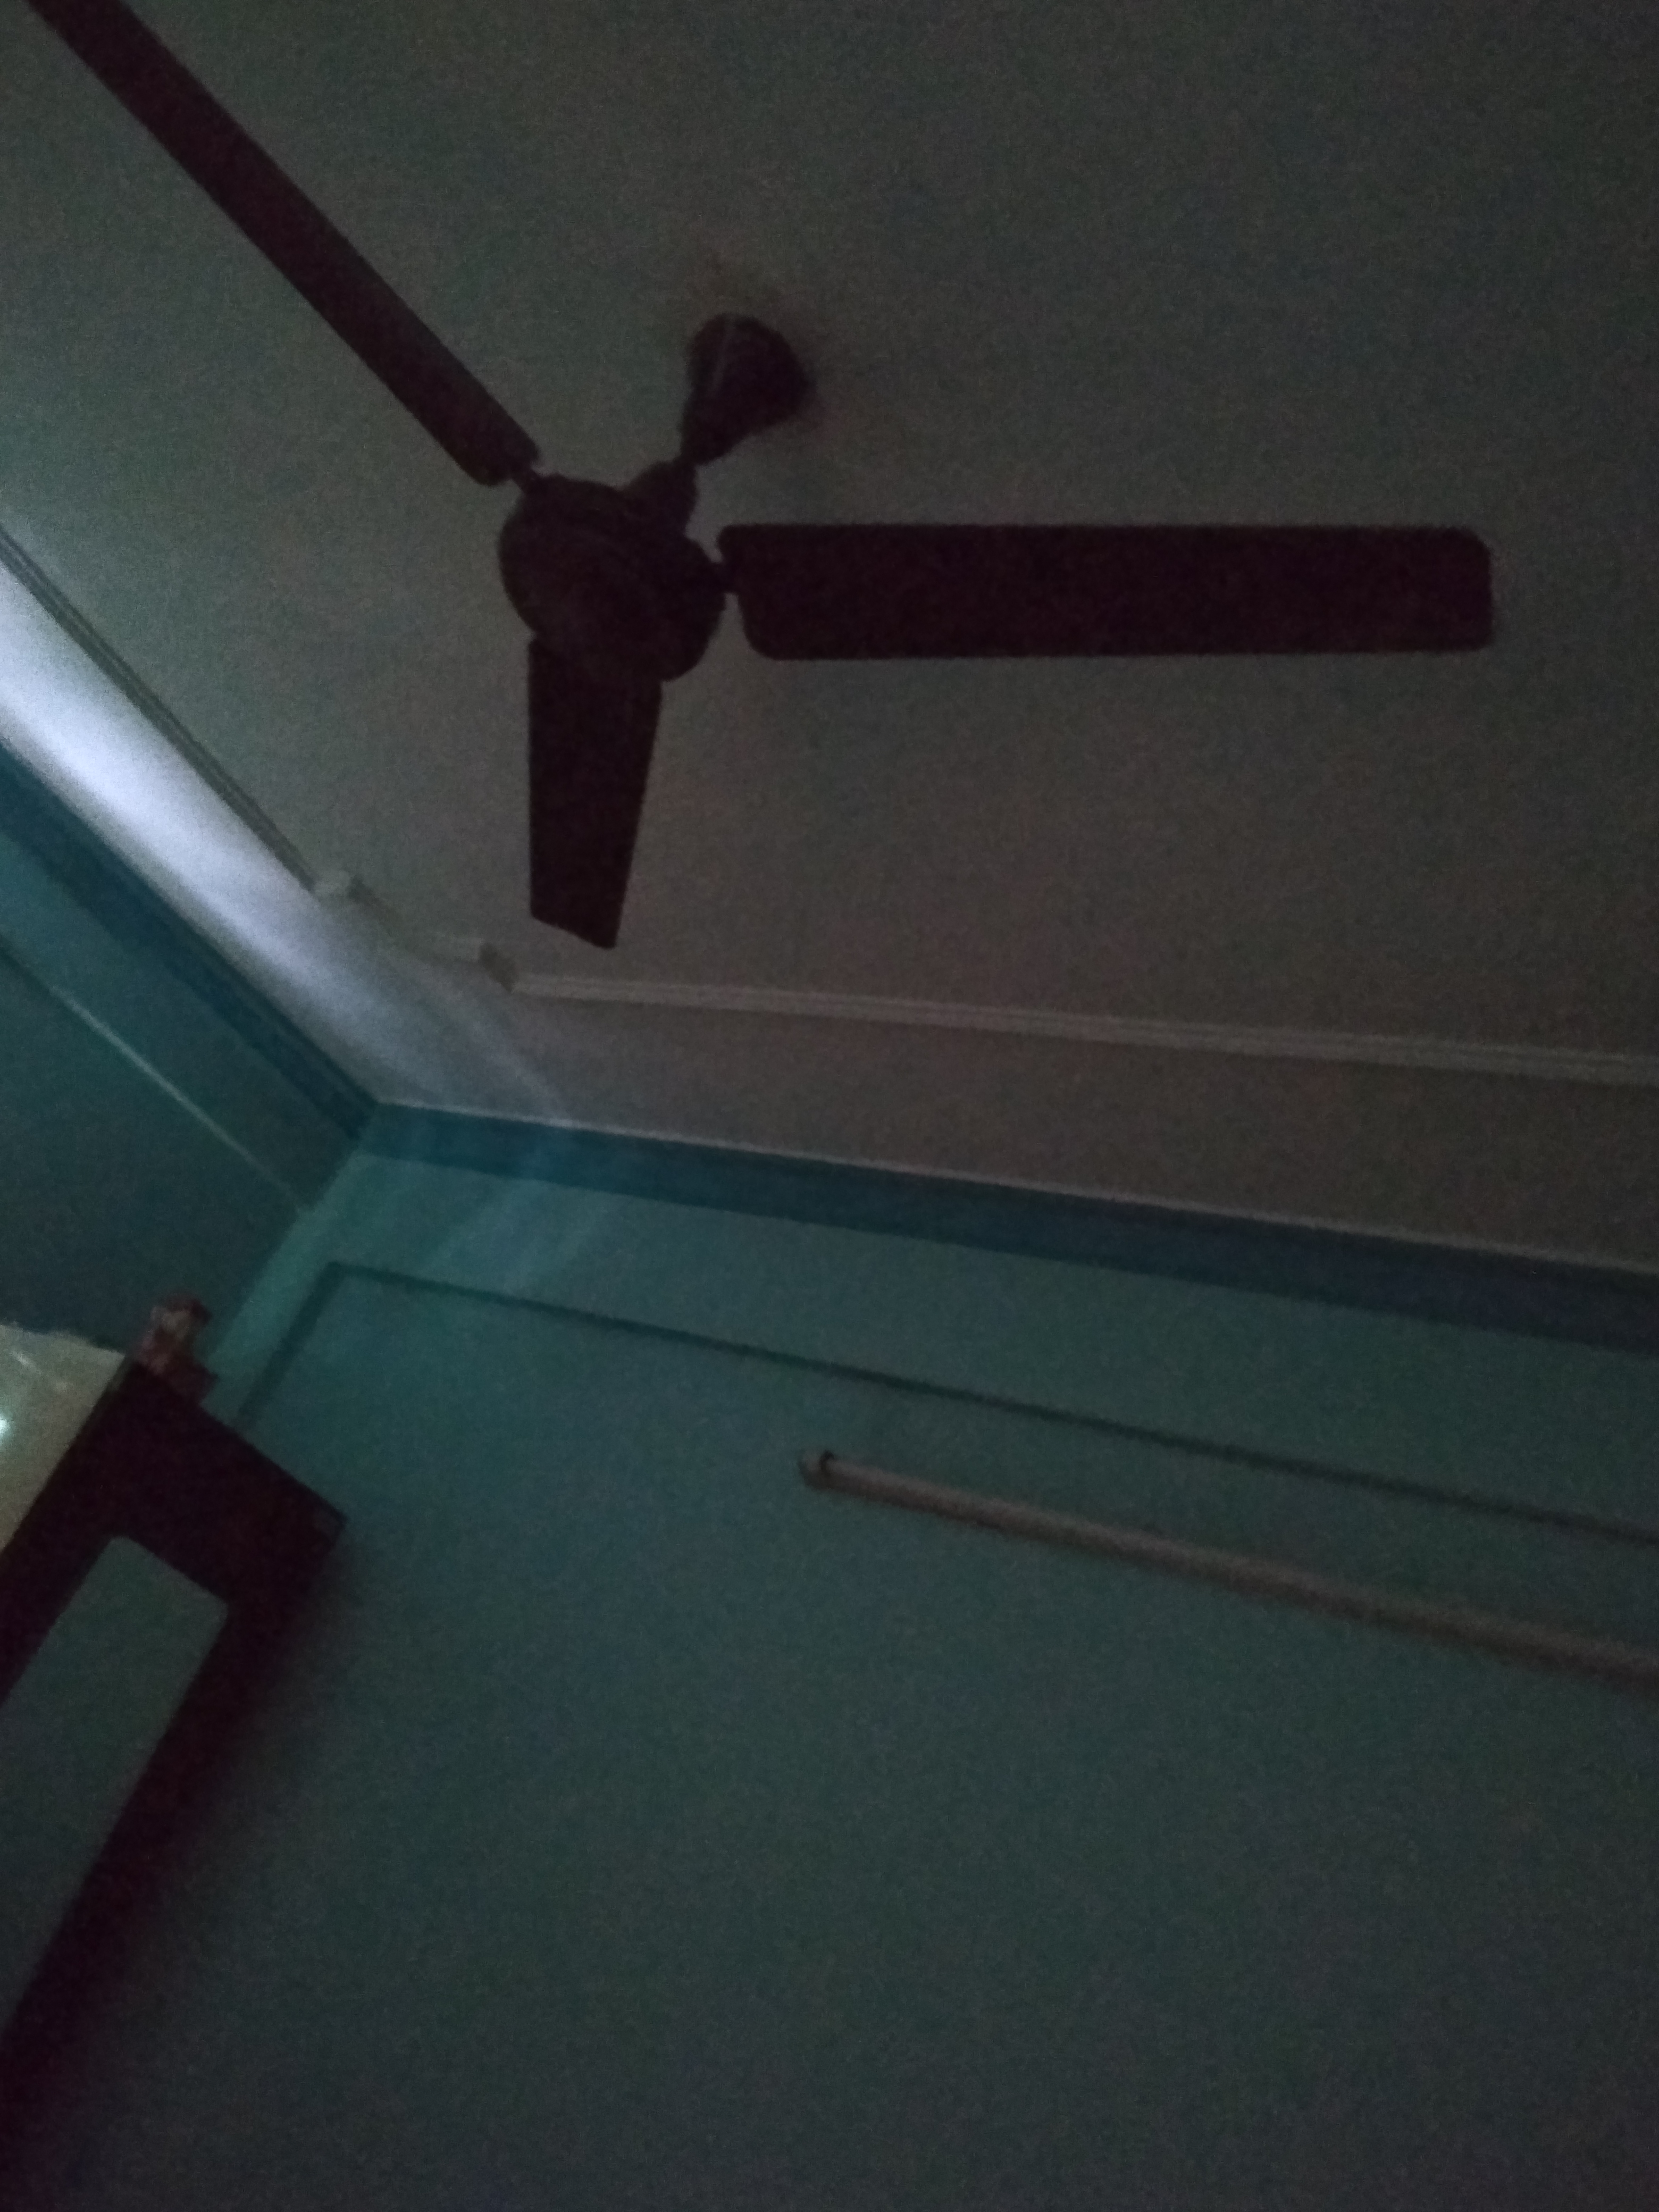

[('100', 'label3', 0.6996424)]


In [8]:
import sys
# Add directory holding utility functions to path to allow importing
sys.path.append('C:/Users/Soumya/Python_Workspace/DEEP_LEARNING/RoomDetect/Utils')
from decode_predictions import decode_predictions

from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=1, class_list_path='C:/Users/Soumya/Python_Workspace/DEEP_LEARNING/RoomDetect/resnet50/class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])